# Students Performance in Exams

This [Kaggle's dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) has information about students' parents level of education, gender, exam preparation, etc. Its goal is to understand the influence of this mentioned factors on their exams perfomance.

We will be doing some EDA and some statistical analysis.

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from tabulate import tabulate
from itertools import product
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

## First Look to the Dataset

We start by reading the data and seeing if there's any null values.

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Let's see basic stats from the data.

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Notice the mean and deviation on all the test scores have similar values.

Now, let's see how many of each type we have in the categorical variables.

In [9]:
for col in df.select_dtypes(include='object'):
    #print(f"\nColumn: {col}")
    print(f'\n')
    counts = df[col].value_counts(dropna=False).reset_index()
    counts.columns = [col, 'Count']
    print(tabulate(counts, headers='keys', tablefmt='pretty'))




+---+--------+-------+
|   | gender | Count |
+---+--------+-------+
| 0 | female |  518  |
| 1 |  male  |  482  |
+---+--------+-------+


+---+----------------+-------+
|   | race/ethnicity | Count |
+---+----------------+-------+
| 0 |    group C     |  319  |
| 1 |    group D     |  262  |
| 2 |    group B     |  190  |
| 3 |    group E     |  140  |
| 4 |    group A     |  89   |
+---+----------------+-------+


+---+-----------------------------+-------+
|   | parental level of education | Count |
+---+-----------------------------+-------+
| 0 |        some college         |  226  |
| 1 |     associate's degree      |  222  |
| 2 |         high school         |  196  |
| 3 |      some high school       |  179  |
| 4 |      bachelor's degree      |  118  |
| 5 |       master's degree       |  59   |
+---+-----------------------------+-------+


+---+--------------+-------+
|   |    lunch     | Count |
+---+--------------+-------+
| 0 |   standard   |  645  |
| 1 | free/reduced 

Note that, in terms of gender, we have a balanced dataset.

## EDA and Stats Analysis

We start this section by computing the average score, for each student, between the three tests and appending it, as a new column, to the df.

In [4]:
df['avg score'] = ( df['math score'] + df['reading score'] + df['writing score'] ) / 3

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Next, we will plot some boxplots to see how the scores are distributed, considering different types of factors, starting with the gender.

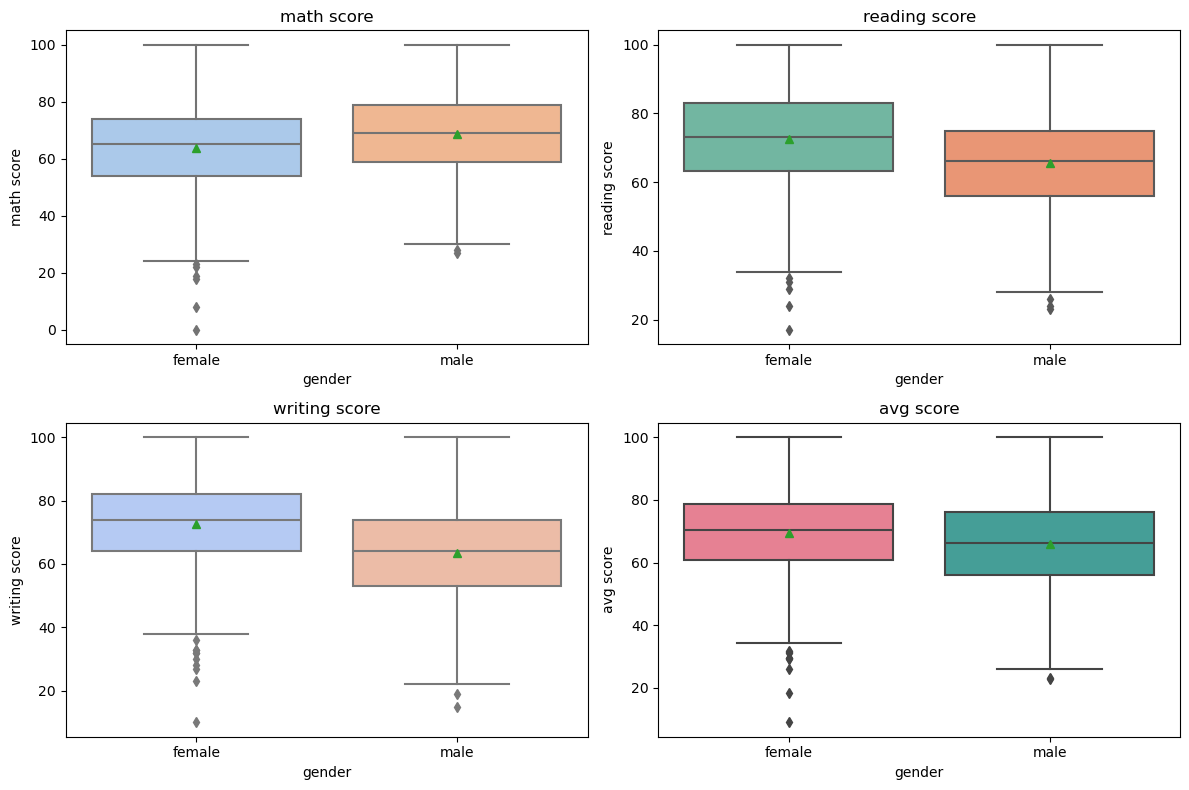

In [16]:
scores = ['math score', 'reading score', 'writing score', 'avg score']
palettes = ['pastel', 'Set2', 'coolwarm', 'husl']  

n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = list(product(range(n_rows), range(n_cols)))

for i, (score, palette) in enumerate(zip(scores, palettes)):
    row, col = axes_flat[i]
    ax = axes[row, col]
    sns.boxplot(x='gender', y=score, data=df, showmeans=True, palette=palette, ax=ax)
    ax.set_title(score)

plt.tight_layout()
plt.show()

Notice that women are doing a better job on writing and reading score, while men have better results on the math exam. If we average the three scores, women seem to have higher scores, on average of course.

Let's look now if there is an effect on doing some preparation before the test.

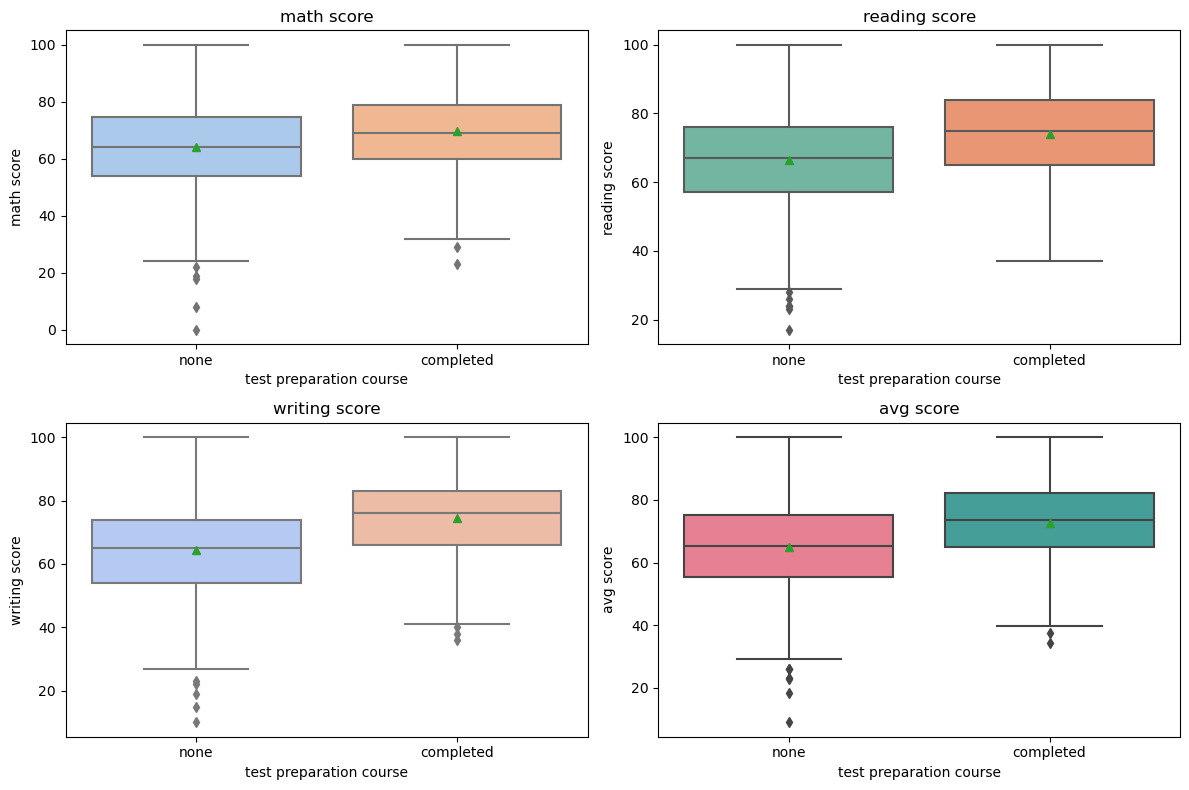

In [ ]:
scores = ['math score', 'reading score', 'writing score', 'avg score']
palettes = ['pastel', 'Set2', 'coolwarm', 'husl'] 

n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = list(product(range(n_rows), range(n_cols)))

for i, (score, palette) in enumerate(zip(scores, palettes)):
    row, col = axes_flat[i]
    ax = axes[row, col]
    sns.boxplot(x='test preparation course', y=score, data=df, showmeans=True, palette=palette, ax=ax)
    ax.set_title(score)

plt.tight_layout()
plt.show()

Based on the plots, it seems to be a good idea doing some course preparation for the exams.

Does the type of lunch the students have influence on the tests scores?

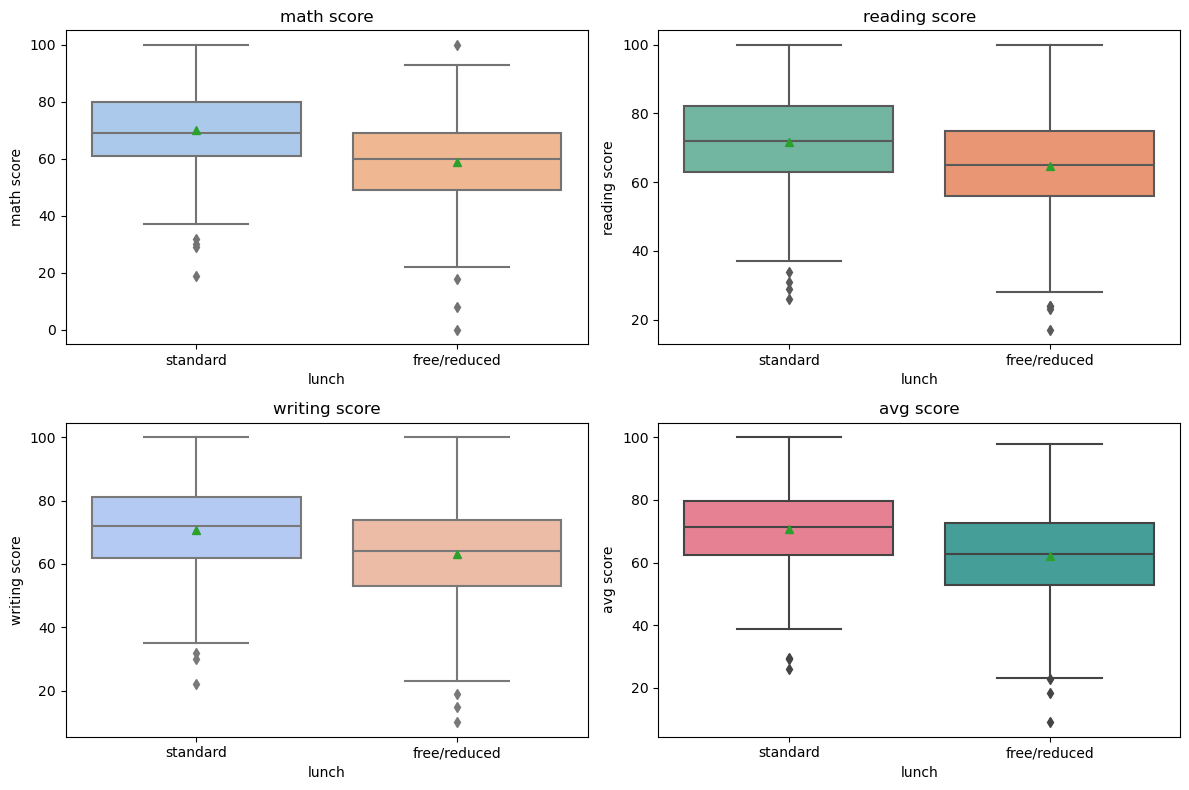

In [18]:
scores = ['math score', 'reading score', 'writing score', 'avg score']
palettes = ['pastel', 'Set2', 'coolwarm', 'husl'] 
n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = list(product(range(n_rows), range(n_cols)))

for i, (score, palette) in enumerate(zip(scores, palettes)):
    row, col = axes_flat[i]
    ax = axes[row, col]
    sns.boxplot(x='lunch', y=score, data=df, showmeans=True, palette=palette, ax=ax)
    ax.set_title(score)

plt.tight_layout()
plt.show()

It seems so. And what about parental lvl of education?

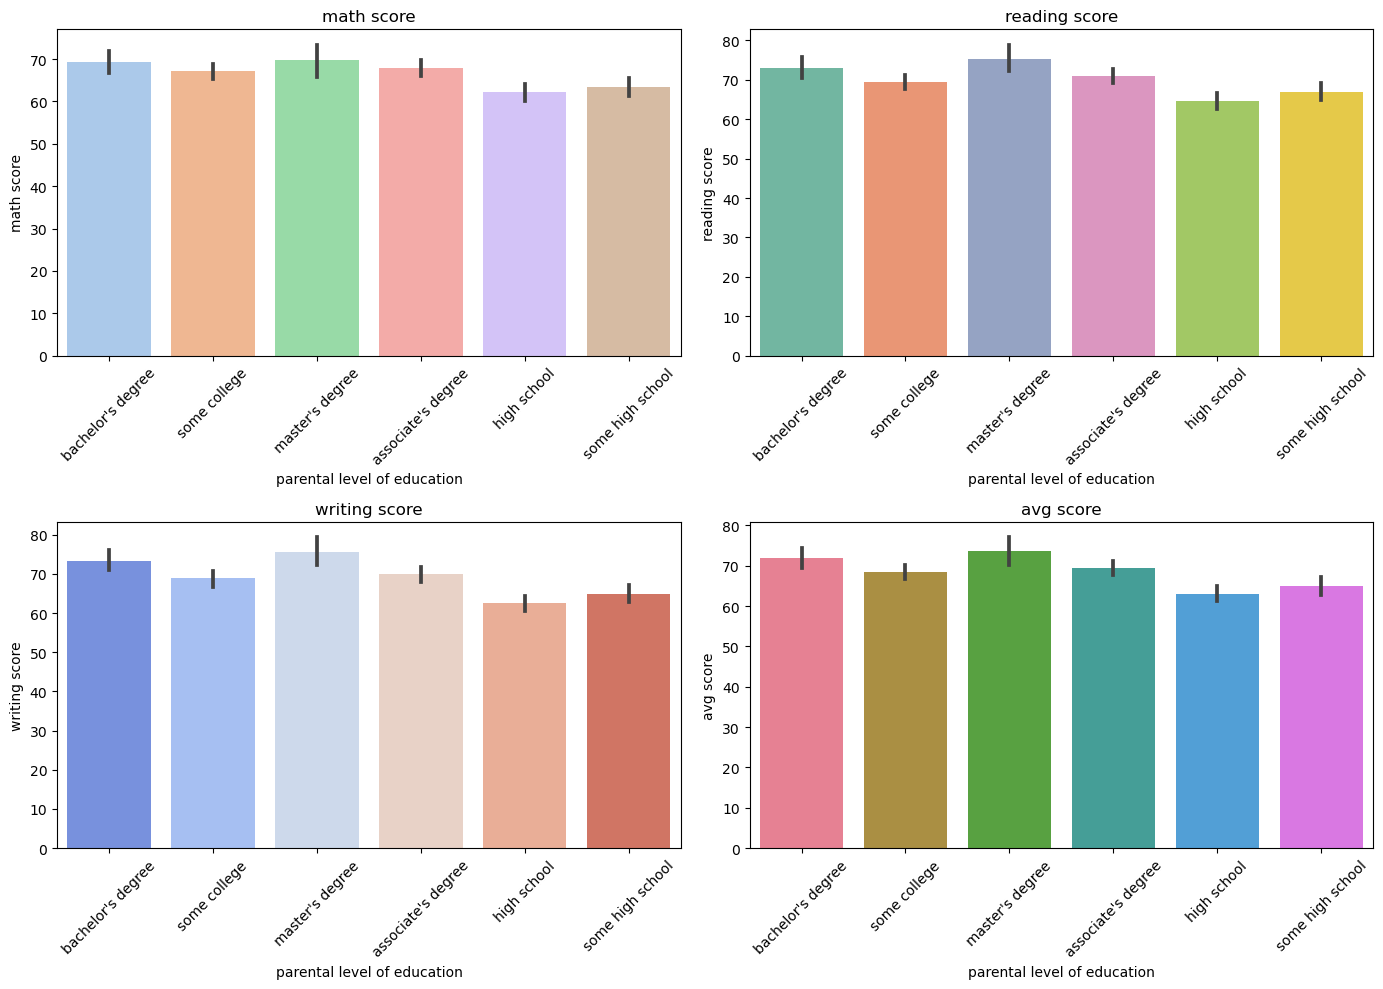

In [22]:
scores = ['math score', 'reading score', 'writing score', 'avg score']
palettes = ['pastel', 'Set2', 'coolwarm', 'husl'] 

n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes_flat = list(product(range(n_rows), range(n_cols)))

for i, (score, palette) in enumerate(zip(scores, palettes)):
    row, col = axes_flat[i]
    ax = axes[row, col]
    sns.barplot(x='parental level of education', y=score, data=df, palette=palette, ax=ax)
    ax.set_title(score)
    ax.tick_params(axis='x', rotation=45)  # Rotate x labels

plt.tight_layout()
plt.show()

Students whose parents have a master's seems to do a bit better.

Let's see if there is are correlation between variables. At first, we might think that students' scores over the different type of exams have some correlation, for example.

In [6]:
num_df = df.copy()

for col in num_df.select_dtypes(include='object'):
    num_df[col] = pd.factorize(num_df[col])[0]

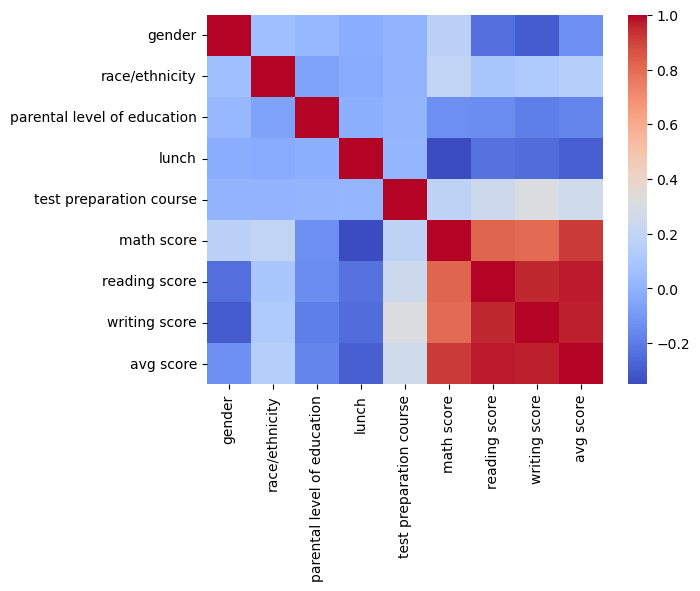

In [7]:
sns.heatmap(num_df.corr(), cmap='coolwarm')
plt.show()

Not only there's correlation between the scores, but also, as we saw on the boxplots, there's some between scores and type of lunch or gender, for example.

We now move on some tests. Just remember we are mainly doing an EDA, not formal inference. 

First, we want to test the mean avg score based on gender. Having in mind what we saw on the boxplot, our null hyphotesis will be that women's mean avg is the same as men, and our alternative hyphotesis is that women's is different than men's.

In [21]:
male_scores = df[df['gender'] == 'male']['avg score']
female_scores = df[df['gender'] == 'female']['avg score']

t_stat, p_val = ss.ttest_ind(female_scores, male_scores, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val:.5f}')

T-statistic: 4.17888598340718
P-value: 0.00003


Since our p-value is smaller than 0.05, we reject the null hypothesis that women and men have the same mean avg score. This suggests there is statistically significant evidence that women and men differ in average score — with women having higher avg score in our sample.

Now, let's do similar but with math score, when men seem to did it better. Null and alternative hyphotesis are established in a similar way than before.

In [22]:
math_male_scores = df[df['gender'] == 'male']['math score']
math_female_scores = df[df['gender'] == 'female']['math score']

t_stat, p_val = ss.ttest_ind(math_male_scores, math_female_scores, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val:.8f}')

T-statistic: 5.398000564160736
P-value: 0.00000008


Again, we get a similar outcome.

We move on now to see if there are some association or not between categorical variables. or example, let's try out a Chi Square test for the gender and the the test preparation. The null hyphotesis is that the gender and the preparation are independent, i.e., there's no relation between them. A high statistic value and low (smaller than 0.05) p value will make us reject the null hyphotesis, saying the variables are dependent, ie., theres an association between gender and prep.

In [17]:
contingency = pd.crosstab(df['gender'], df['test preparation course'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(chi2,p)

0.015529201882465888 0.9008273880804724


Based on the values, we don't have enough evidence to reject the null hyphotesis that our variables are independent. Let's try out with other categories, for example, with the parental level of education and the test preparation course.

In [18]:
contingency = pd.crosstab(df['parental level of education'], df['test preparation course'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(chi2,p)

9.54407054307069 0.08923388625809343


Since we normally considrer a confidence level of 90%, we don't have enough p value to reject the null hyphotesis and speak about dependent variables in this case either. However, if we have consider a confidence level of 90% then we would have statiscal significance for this result.


To finish the analysis, let's now check if there's some relation between the means of the math test score through the different parental level of education groups.

In [19]:
groups = [group['math score'].values for name, group in df.groupby('parental level of education')]
f_stat, p_val = f_oneway(*groups)
print(f_stat, p_val)

6.521582600453218 5.592272384107223e-06


As we might expected from the barplots, we reject the null hyphotesis that the means of math scores are the same across different parental level of education groups.

Thank your for reading!
FernánZL.